# 1. Environment Setup

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]
mRNA_peak_150_file = doc["mRNA_peak_150_file"]
supplemental = doc["supplemental"]
tss_annotation = doc['tss_annotation']

import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
import time

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
from create_output import *
print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


In [2]:
import plot_tss_results

In [3]:
import motif_analysis

## Create directory

In [4]:
out_dir = "Results/Figures/12032019/SuppFigure3/"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

## Motif Generation

### Using FIMO

# 1. 

## First do the TSSs used in the final output

### Experimental

--------

--------

--------

--------

# Plotting

In [5]:
from motif_analysis import *

# 1. TSS1 exp vs TSS1 refseq_centered_exp 

## Transform motifs  into binary matrix of presence/absence

Create sequence-by-|basepairs| matrix , fill in with the start of the motif where present. 
fimo output is 1-based indexing 

In [6]:
fig_dir = os.path.join(out_dir,"Figures")
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [7]:
peak_center = 75 #75 basepairs for each peak

In [8]:
peak_f = "Results/output/TSS1.exp.bed"
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_meme/fimo.tsv"
peaks_df_exp = read_bed_file(peak_f)
motifs_df_exp = pd.read_csv(motif_f,sep="\t",comment="#")
#inr = motifs_df[motifs_df["motif_id"] == "inr.motif"]
motifs_df_exp.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,ronin.motif,NaN,p1@Znf8_XM_027431202.1,60,79,-,30.4364,1.230000e-12,0.000006,GACTACAACTCCCAGAAGGC
1,gfy-staf.motif,NaN,p1@Rbbp9_XM_027421615.1,18,37,+,31.7455,1.830000e-12,0.000010,AACTACAATTCCCAGAAGGC
2,ronin.motif,NaN,p1@Gabpa_XM_027412373.1,9,28,-,30.1212,1.910000e-12,0.000006,AACTACAACTCCCAGCAGGC
3,rest.motif,NaN,p1@Vwc2l_XM_027397153.1,83,102,+,31.6788,2.400000e-12,0.000017,GGCGCTGTCCGTGGTGCTGA
4,ronin.motif,NaN,p1@Polk_XM_027401683.1,110,129,-,30.1152,2.470000e-12,0.000006,GACTACAACTCCCAGGAGGC


In [9]:
peak_f = "Results/output/TSS1.exp.bed"
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme/fimo.tsv"
peaks_df_ref = read_bed_file(peak_f)
motifs_df_ref = pd.read_csv(motif_f,sep="\t",comment="#")
#inr = motifs_df[motifs_df["motif_id"] == "inr.motif"]
motifs_df_ref.head()

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,sp1.motif,NaN,p2@Epas1_XM_027417972.1,1,12,+,21.6061,1.720000e-08,0.000202,GGCCCCGCCCCC
1,sp1.motif,NaN,p1@Epas1_XM_027417972.1,1,12,+,21.6061,1.720000e-08,0.000202,GGCCCCGCCCCC
2,sp1.motif,NaN,p1@Gas6_XM_027387801.1,2,13,+,21.6061,1.720000e-08,0.000202,GGCCCCGCCCCC
3,sp1.motif,NaN,p1@Rel_XM_027388002.1,4,15,+,21.6061,1.720000e-08,0.000202,GGCCCCGCCCCC
4,sp1.motif,NaN,p2@Rel_XM_027388002.1,4,15,+,21.6061,1.720000e-08,0.000202,GGCCCCGCCCCC


In [10]:
motifs_of_interest = ["tata.motif", "inr.motif"]

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


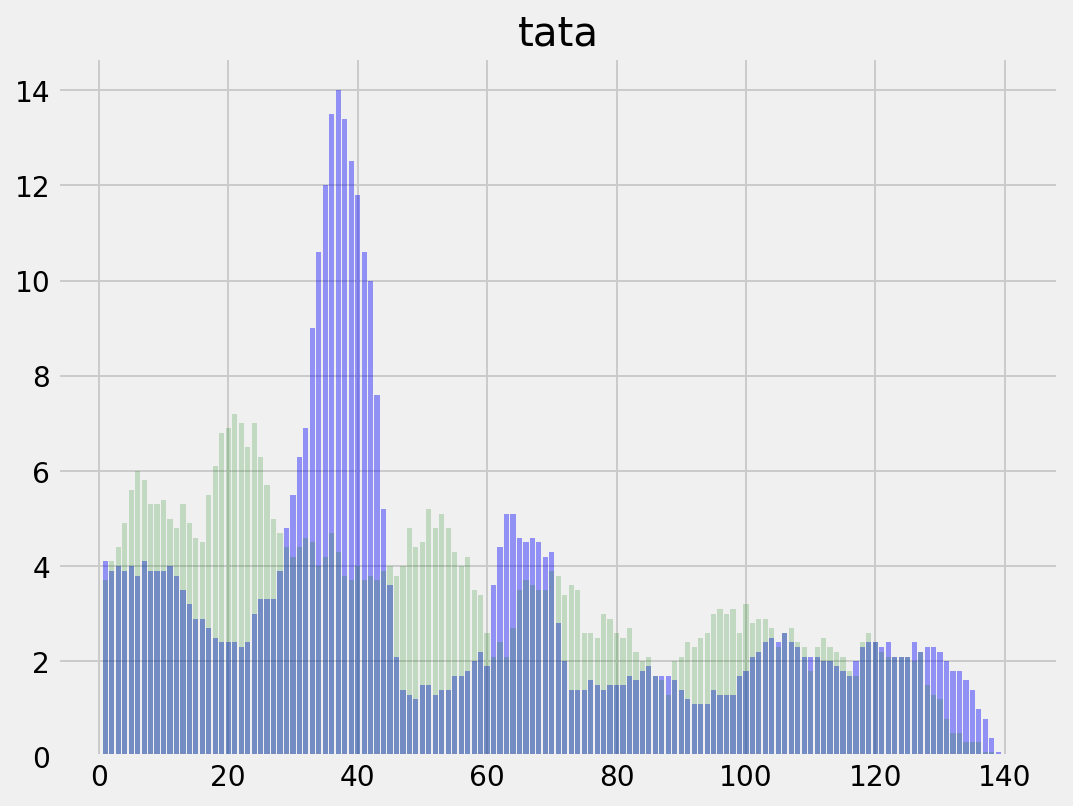

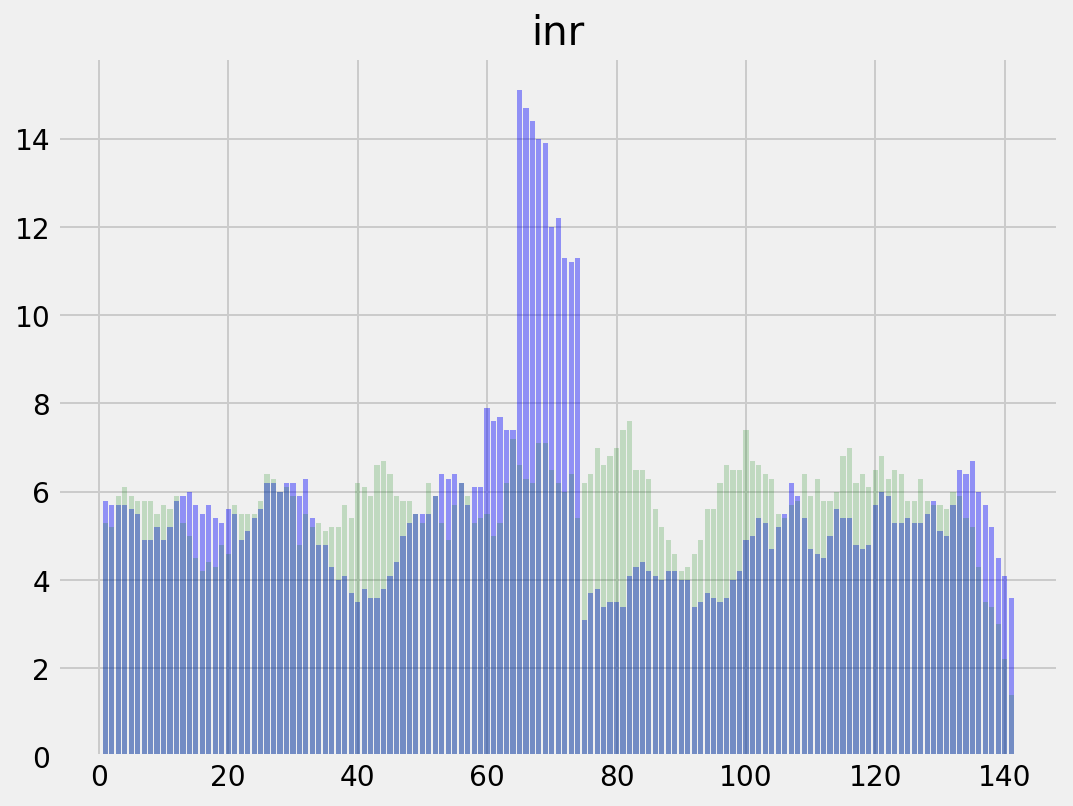

In [11]:
for m in motifs_of_interest:
    curr_exp = motifs_df_exp[motifs_df_exp["motif_id"] ==  m]
    curr_ref = motifs_df_ref[motifs_df_ref["motif_id"] ==  m]
    
    #curr = motifs_df.query("motif_id == 'tata.motif' ")
    num_nts = np.max((np.max(curr_exp["stop"]), np.max(curr_ref["stop"]))) #np.max(curr["stop"] - (curr["start"])+1)
    
    curr_out_pos_exp = motif_analysis.initialize_motif_df(peaks_df_exp.index,seq_len=num_nts)
    curr_out_pos_ref = motif_analysis.initialize_motif_df(peaks_df_ref.index,seq_len=num_nts)

    #first_seq = curr_out.columns.values[0]
    first_seq = curr_out_pos_exp.columns.values[0]
    for ind,val in tqdm.tqdm_notebook(curr_exp.iterrows()):
        if val["strand"] == "+":
            curr_out_pos_exp.at[val["sequence_name"],first_seq + val["start"] - 1] = True
            
    for ind,val in tqdm.tqdm_notebook(curr_ref.iterrows()):
        if val["strand"] == "+":
            curr_out_pos_ref.at[val["sequence_name"],first_seq + val["start"] - 1] = True
    
            
    N = 10
    f,ax = plt.subplots()
    
    
    y_exp = np.convolve(np.array(curr_out_pos_exp.sum()), np.ones((N,))/N, mode='valid')
    y_exp_refseq_centered = np.convolve(np.array(curr_out_pos_ref.sum()), np.ones((N,))/N, mode='valid')

    ax.bar(x=range(1, len(y_exp)+1), height= y_exp, color="b", alpha=0.4)
    ax.bar(x=range(1, len(y_exp_refseq_centered)+1), height= y_exp_refseq_centered, color="g", alpha=0.2)
    plt.title(m.replace(".motif", ""))

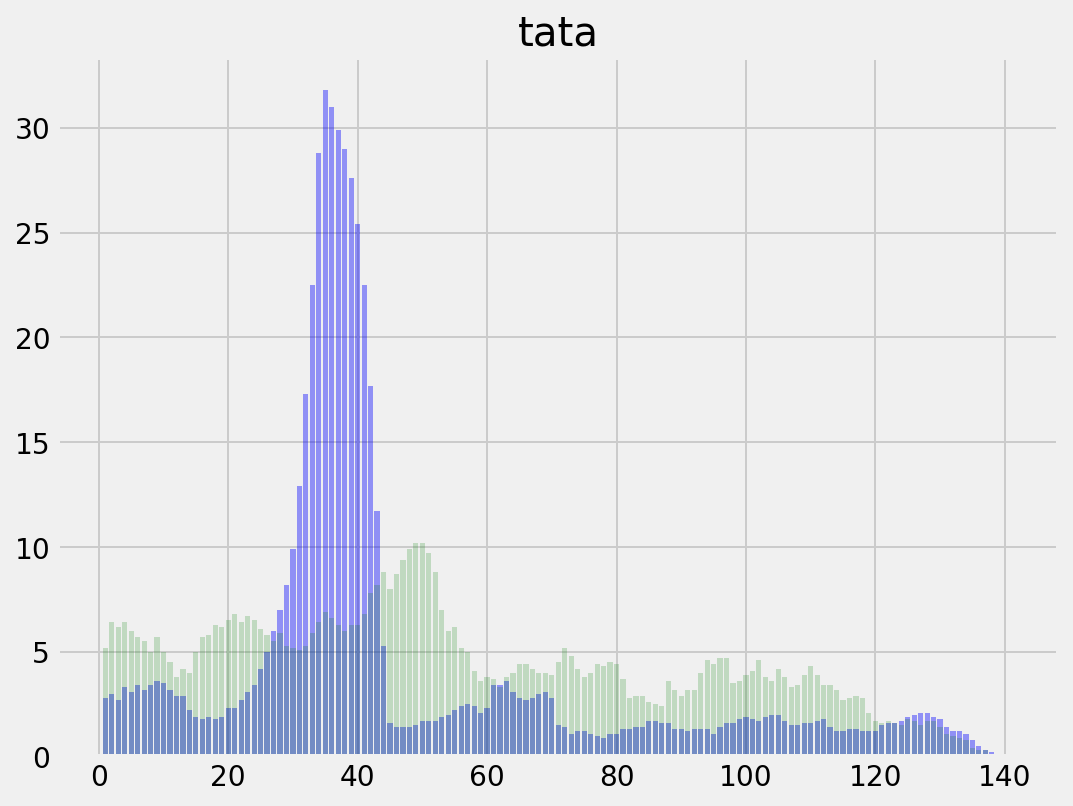

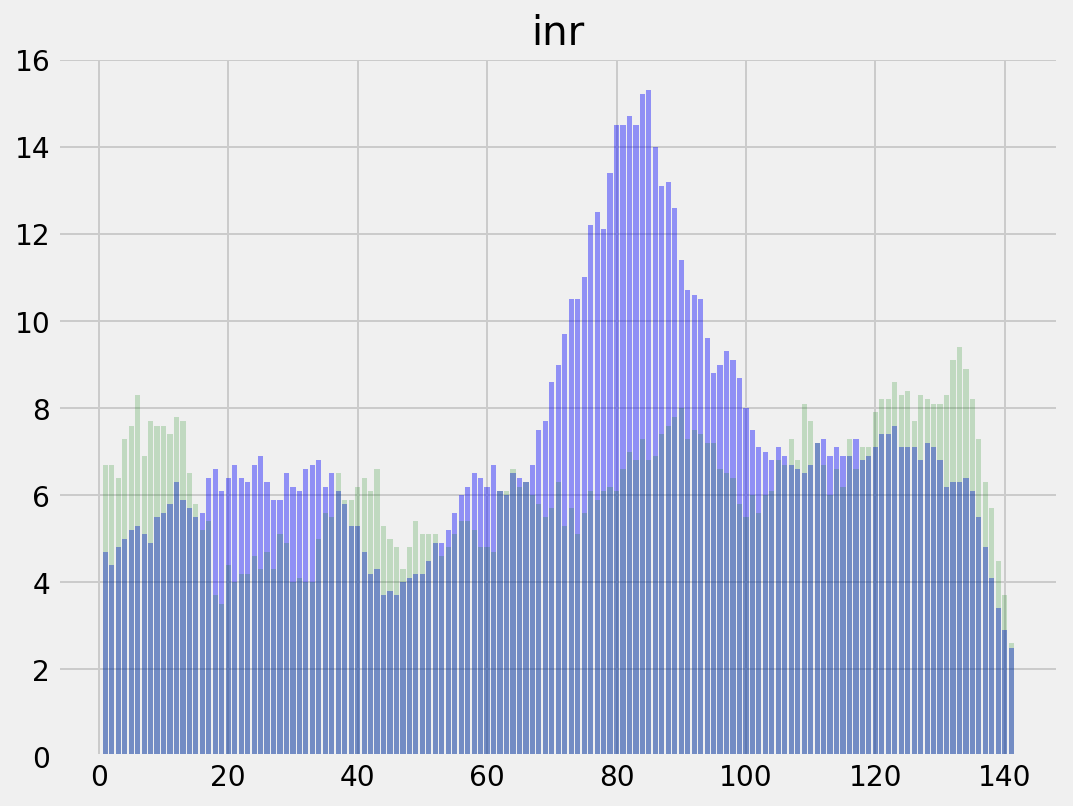

In [12]:
for m in motifs_of_interest:
    curr_exp = motifs_df_exp[motifs_df_exp["motif_id"] ==  m]
    curr_ref = motifs_df_ref[motifs_df_ref["motif_id"] ==  m]
    
    #curr = motifs_df.query("motif_id == 'tata.motif' ")
    num_nts = np.max((np.max(curr_exp["stop"]), np.max(curr_ref["stop"]))) #np.max(curr["stop"] - (curr["start"])+1)
    
    curr_out_neg_exp = motif_analysis.initialize_motif_df(peaks_df_exp.index,seq_len=num_nts)
    curr_out_neg_ref = motif_analysis.initialize_motif_df(peaks_df_ref.index,seq_len=num_nts)

    #first_seq = curr_out.columns.values[0]
    first_seq = curr_out_neg_exp.columns.values[0]
    for ind,val in (curr_exp.iterrows()):
        if val["strand"] == "-":
            curr_out_neg_exp.at[val["sequence_name"],first_seq + val["start"] - 1] = True
            
    for ind,val in (curr_ref.iterrows()):
        if val["strand"] == "-":
            curr_out_neg_ref.at[val["sequence_name"],first_seq + val["start"] - 1] = True
    
            
    N = 10
    f,ax = plt.subplots()
    
    
    y_exp = np.convolve(np.array(curr_out_neg_exp.sum()), np.ones((N,))/N, mode='valid')
    y_exp_refseq_centered = np.convolve(np.array(curr_out_neg_ref.sum()), np.ones((N,))/N, mode='valid')

    ax.bar(x=range(1, len(y_exp)+1), height= y_exp, color="b", alpha=0.4)
    ax.bar(x=range(1, len(y_exp_refseq_centered)+1), height= y_exp_refseq_centered, color="g", alpha=0.2)
    
    plt.title(m.replace(".motif", ""))

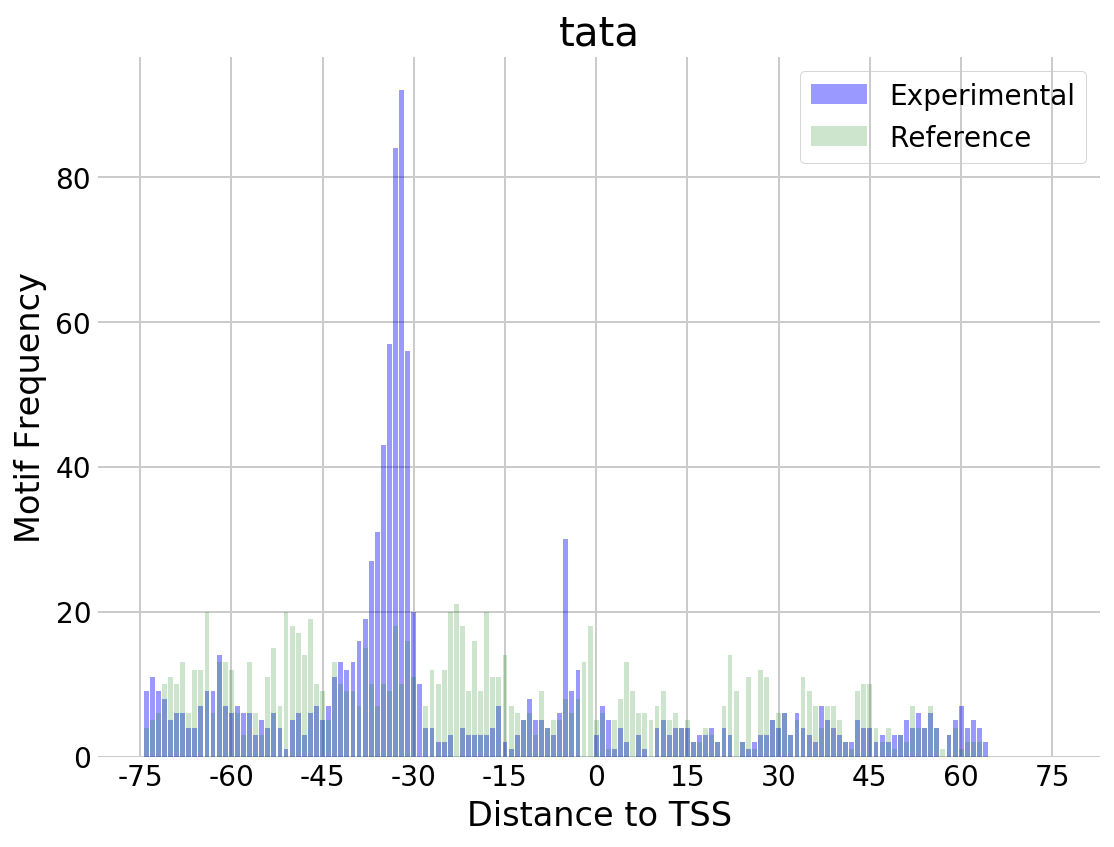

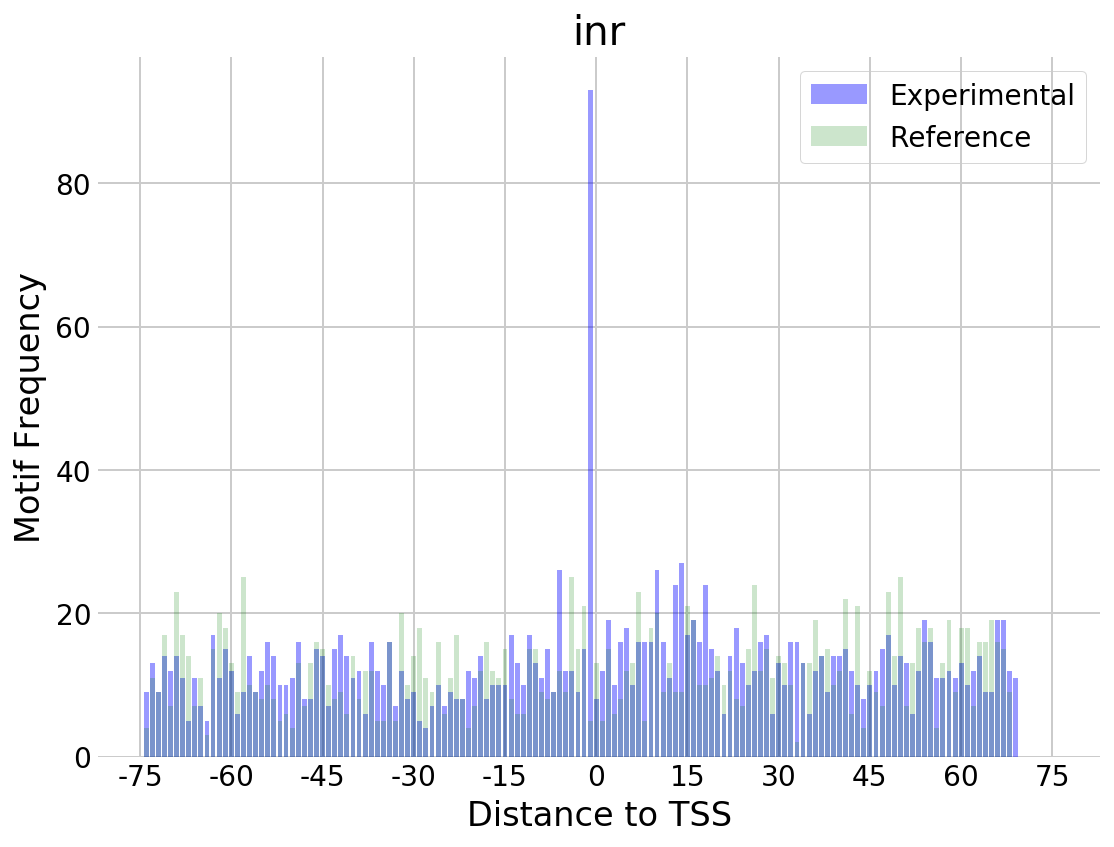

In [16]:

for m in motifs_of_interest:
    curr_exp = motifs_df_exp[motifs_df_exp["motif_id"] ==  m]
    curr_ref = motifs_df_ref[motifs_df_ref["motif_id"] ==  m]
    
    #curr = motifs_df.query("motif_id == 'tata.motif' ")
    num_nts = np.max((np.max(curr_exp["stop"]), np.max(curr_ref["stop"]))) #np.max(curr["stop"] - (curr["start"])+1)
    
    curr_out_neg_exp = motif_analysis.initialize_motif_df(peaks_df_exp.index,seq_len=num_nts)
    curr_out_neg_ref = motif_analysis.initialize_motif_df(peaks_df_ref.index,seq_len=num_nts)

    curr_out_pos_exp = motif_analysis.initialize_motif_df(peaks_df_exp.index,seq_len=num_nts)
    curr_out_pos_ref = motif_analysis.initialize_motif_df(peaks_df_ref.index,seq_len=num_nts)

    
    #first_seq = curr_out.columns.values[0]
    first_seq = curr_out_neg_exp.columns.values[0]
    for ind,val in (curr_exp.iterrows()):
        if val["strand"] == "-":
            curr_out_neg_exp.at[val["sequence_name"],first_seq + val["start"] - 1] = True
    for ind,val in (curr_ref.iterrows()):
        if val["strand"] == "-":
            curr_out_neg_ref.at[val["sequence_name"],first_seq + val["start"] - 1] = True
    
    for ind,val in (curr_exp.iterrows()):
        if val["strand"] == "+":
            curr_out_pos_exp.at[val["sequence_name"],first_seq + val["start"] - 1] = True
    for ind,val in (curr_ref.iterrows()):
        if val["strand"] == "+":
            curr_out_pos_ref.at[val["sequence_name"],first_seq + val["start"] - 1] = True
        
            
    N = 5
    f,ax = plt.subplots()
    
    
    y_exp = np.array(curr_out_pos_exp.sum()) +np.array(curr_out_neg_exp.sum())
    y_exp_refseq_centered = np.array(curr_out_pos_ref.sum()) + np.array(curr_out_neg_ref.sum())
    
#     y_exp = np.convolve(np.array(curr_out_pos_exp.sum())
#                         +np.array(curr_out_neg_exp.sum()), np.ones((N,)), mode='valid')
#     y_exp_refseq_centered = np.convolve(np.array(curr_out_pos_ref.sum())
#                         +np.array(curr_out_neg_ref.sum()), np.ones((N,)), mode='valid')
    ax.bar(x=range(1, len(y_exp)+1), height= y_exp, color="b", alpha=0.4)
    ax.bar(x=range(1, len(y_exp_refseq_centered)+1), height= y_exp_refseq_centered, color="g", alpha=0.2)
    plt.title(m.replace(".motif", ""))
    
    
    ax.set_xlabel("Distance to TSS")
    ax.set_ylabel("Motif Frequency")
    
    ax.set_xticks(np.arange(-1*peak_center,peak_center+1, 15) + peak_center)
    ax.set_xticklabels(np.arange(-1*peak_center,peak_center+1, 15))
    plt.legend(["Experimental", "Reference"]).get_frame().set_facecolor('none')
    helper_save(os.path.join(out_dir, m.replace(".motif", "") + "_exp_ref" ))

## Need to separate enhancers from promoters

### Plot with convolutions

In [ ]:
plot_tss_results.create_bins(curr_out_pos.sum(),w=1)

### TATAA

Widget Javascript not detected.  It may not be installed or enabled properly.


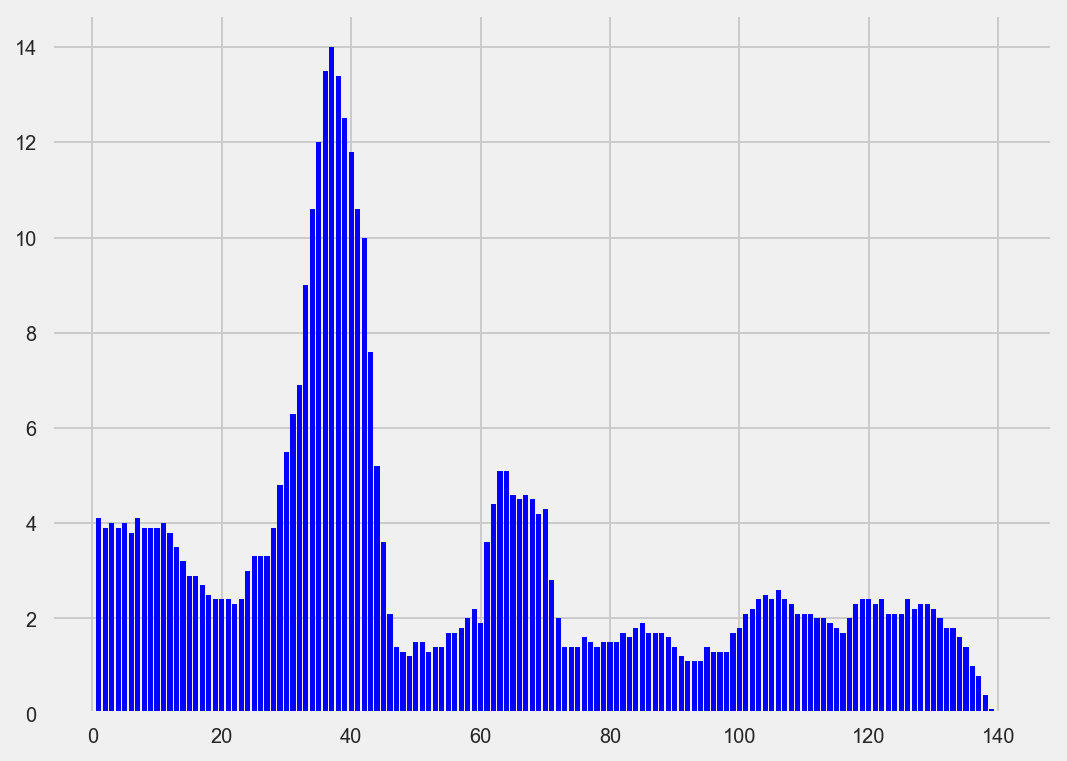

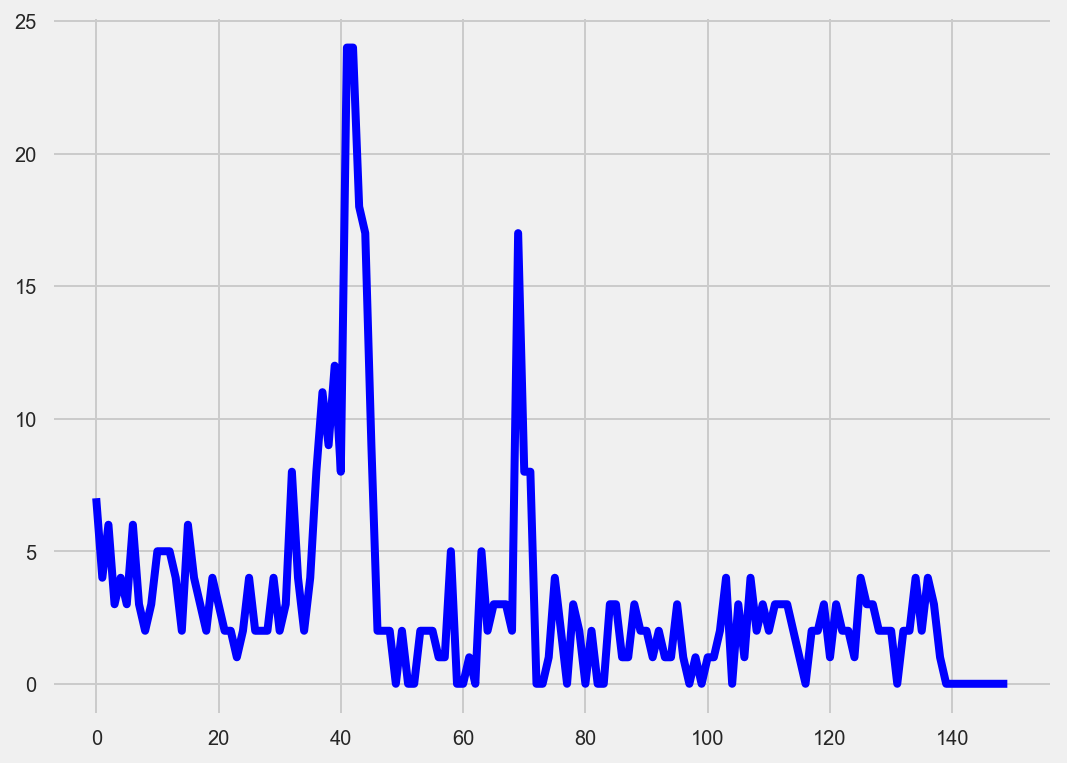

In [41]:
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")


peak_f = "Results/output/TSS1.exp.bed"
peaks_df = read_bed_file(peak_f)

curr = motifs_df.query("motif_id == 'tata.motif' ")
num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)
curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)

#first_seq = curr_out.columns.values[0]
first_seq = curr_out_pos.columns.values[0]

for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
    if val["strand"] == "+":
        curr_out_pos.at[val["sequence_name"],first_seq + val["start"] - 1] = True

N = 10
f = plt.figure()
y_exp = np.convolve(np.array(curr_out_pos.sum()), np.ones((N,))/N, mode='valid')
plt.bar(x=range(1, len(y_exp)+1), height= y_exp)



f = plt.figure()
plt.plot((np.array(curr_out_pos.sum())))


In [52]:
print(len(np.array(curr_out_pos_refseq.sum())))
(len(np.array(curr_out_pos.sum())))


148


150

Widget Javascript not detected.  It may not be installed or enabled properly.


<Container object of 139 artists>

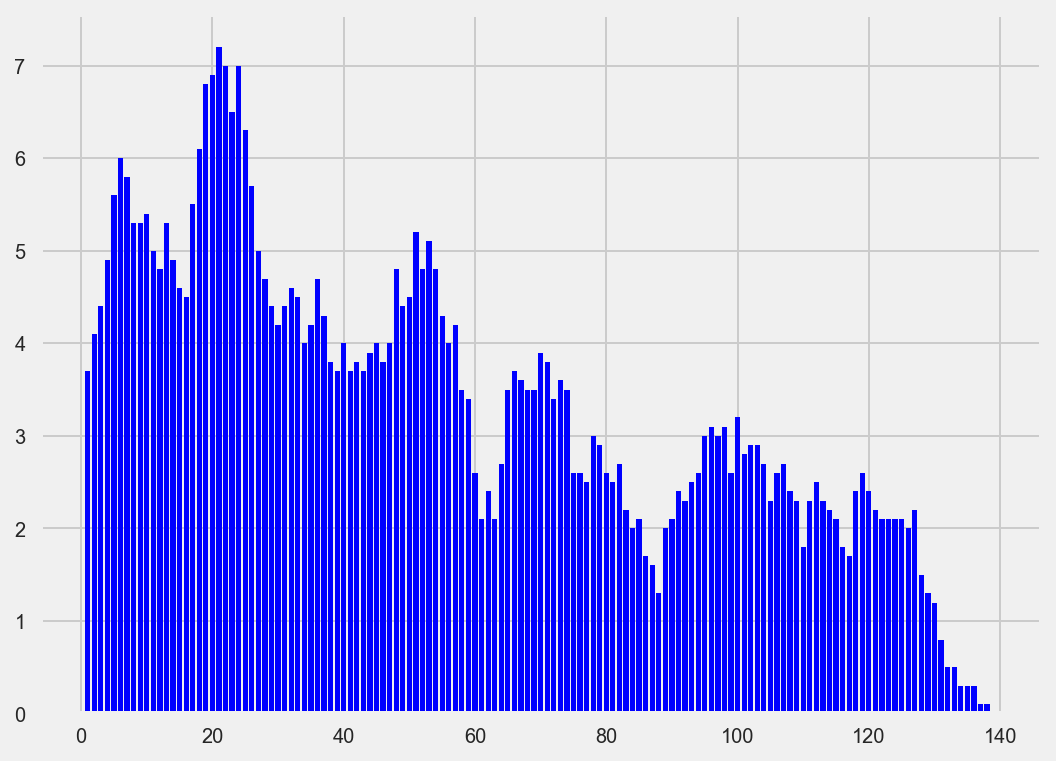

In [42]:
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")


peak_f = "Results/output/TSS1.exp.bed"
peaks_df = read_bed_file(peak_f)

curr = motifs_df.query("motif_id == 'tata.motif' ")
num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)
curr_out_pos_refseq = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)

#first_seq = curr_out.columns.values[0]
first_seq = curr_out_pos_refseq.columns.values[0]

for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
    if val["strand"] == "+":
        curr_out_pos_refseq.at[val["sequence_name"],first_seq + val["start"] - 1] = True

N = 10
f = plt.figure()

y_exp_refseq_centered = np.convolve(np.array(curr_out_pos_refseq.sum()), np.ones((N,))/N, mode='valid')
plt.bar(x=range(1, len(y_exp_refseq_centered)+1), height= y_exp_refseq_centered)

In [46]:
len(y_exp)+1

142

In [48]:
len(y_exp_refseq_centered)+1

140

<Container object of 139 artists>

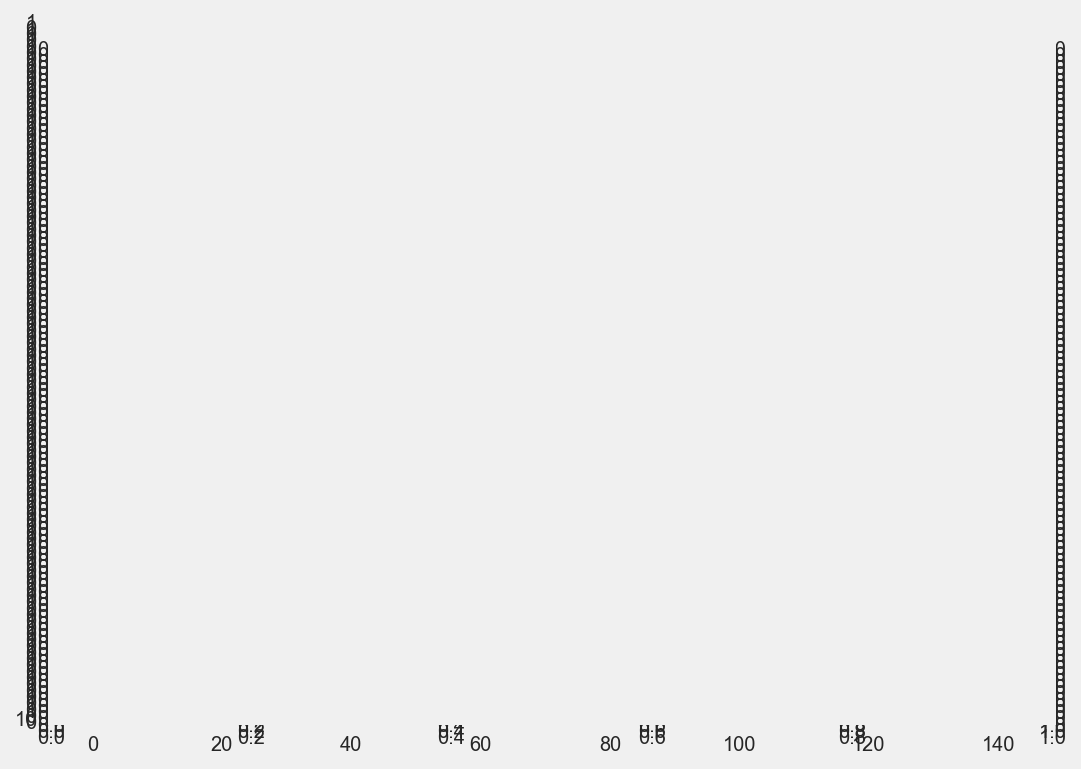

In [45]:
N = 10
f, ax = plt.subplots(111)
y = np.convolve(np.array(curr_out_pos.sum()), np.ones((N,))/N, mode='valid')


plt.bar(x=range(1, len(y_exp)+1), height= y_exp, color="b")
plt.bar(x=range(1, len(y_exp_refseq_centered)+1), height= y_exp_refseq_centered, color="g")

([7,
  4,
  6,
  3,
  4,
  3,
  6,
  3,
  2,
  3,
  5,
  5,
  5,
  4,
  2,
  6,
  4,
  3,
  2,
  4,
  3,
  2,
  2,
  1,
  2,
  4,
  2,
  2,
  2,
  4,
  2,
  3,
  8,
  4,
  2,
  4,
  8,
  11,
  9,
  12,
  8,
  24,
  24,
  18,
  17,
  9,
  2,
  2,
  2,
  0,
  2,
  0,
  0,
  2,
  2,
  2,
  1,
  1,
  5,
  0,
  0,
  1,
  0,
  5,
  2,
  3,
  3,
  3,
  2,
  17,
  8,
  8,
  0,
  0,
  1,
  4,
  2,
  0,
  3,
  2,
  0,
  2,
  0,
  0,
  3,
  3,
  1,
  1,
  3,
  2,
  2,
  1,
  2,
  1,
  1,
  3,
  1,
  0,
  1,
  0,
  1,
  1,
  2,
  4,
  0,
  3,
  1,
  4,
  2,
  3,
  2,
  3,
  3,
  3,
  2,
  1,
  0,
  2,
  2,
  3,
  1,
  3,
  2,
  2,
  1,
  4,
  3,
  3,
  2,
  2,
  2,
  0,
  2,
  2,
  4,
  2,
  4,
  3,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [-75,
  -74,
  -73,
  -72,
  -71,
  -70,
  -69,
  -68,
  -67,
  -66,
  -65,
  -64,
  -63,
  -62,
  -61,
  -60,
  -59,
  -58,
  -57,
  -56,
  -55,
  -54,
  -53,
  -52,
  -51,
  -50,
  -49,
  -48,
  -47,
  -46,
  -45,
  -44,
  -43,
  -42,
  -4

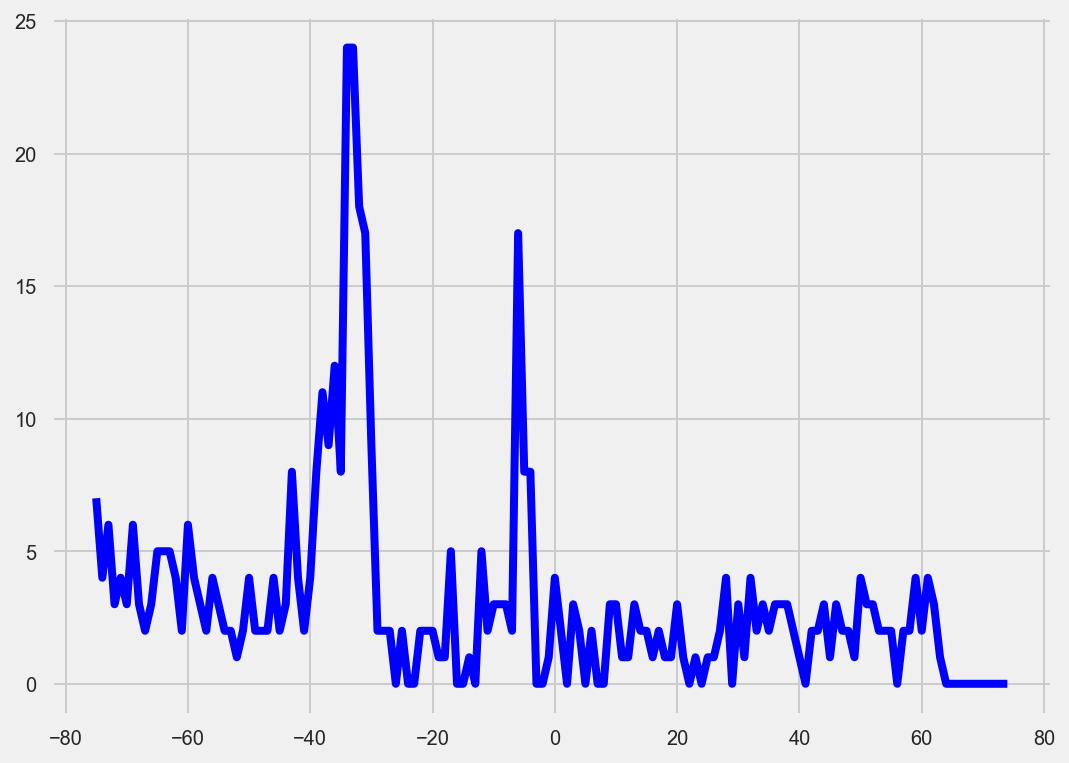

In [14]:
plot_tss_results.create_bins(curr_out_pos.sum(),w=1)

## Initiator

Widget Javascript not detected.  It may not be installed or enabled properly.


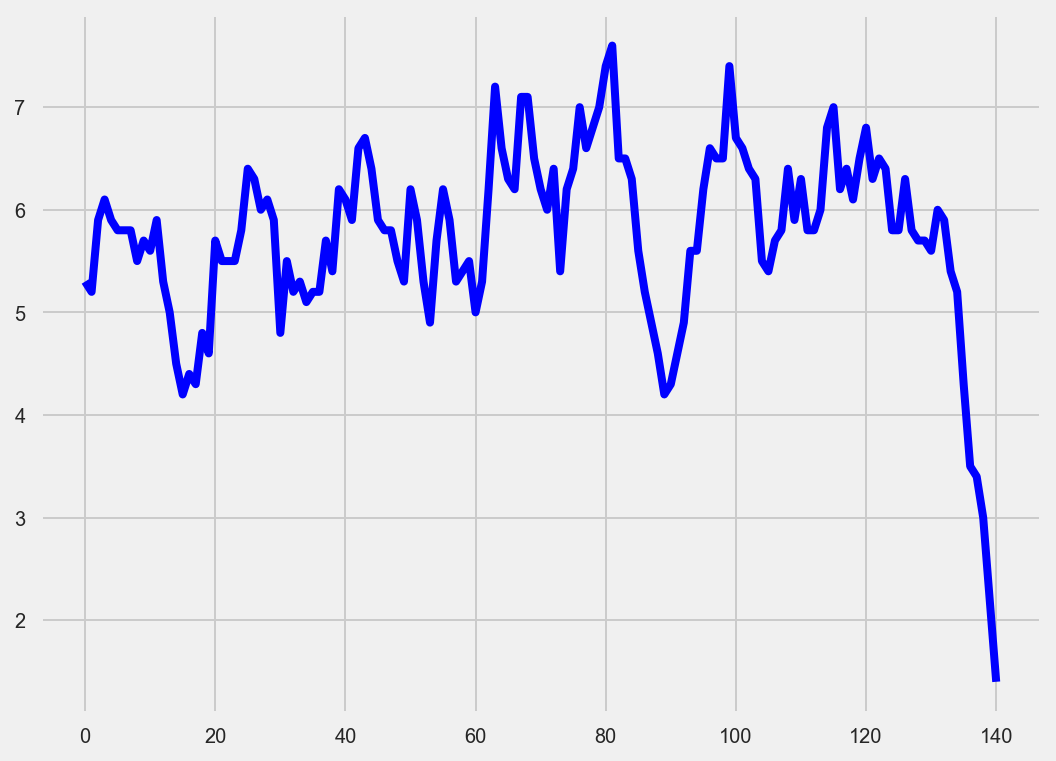

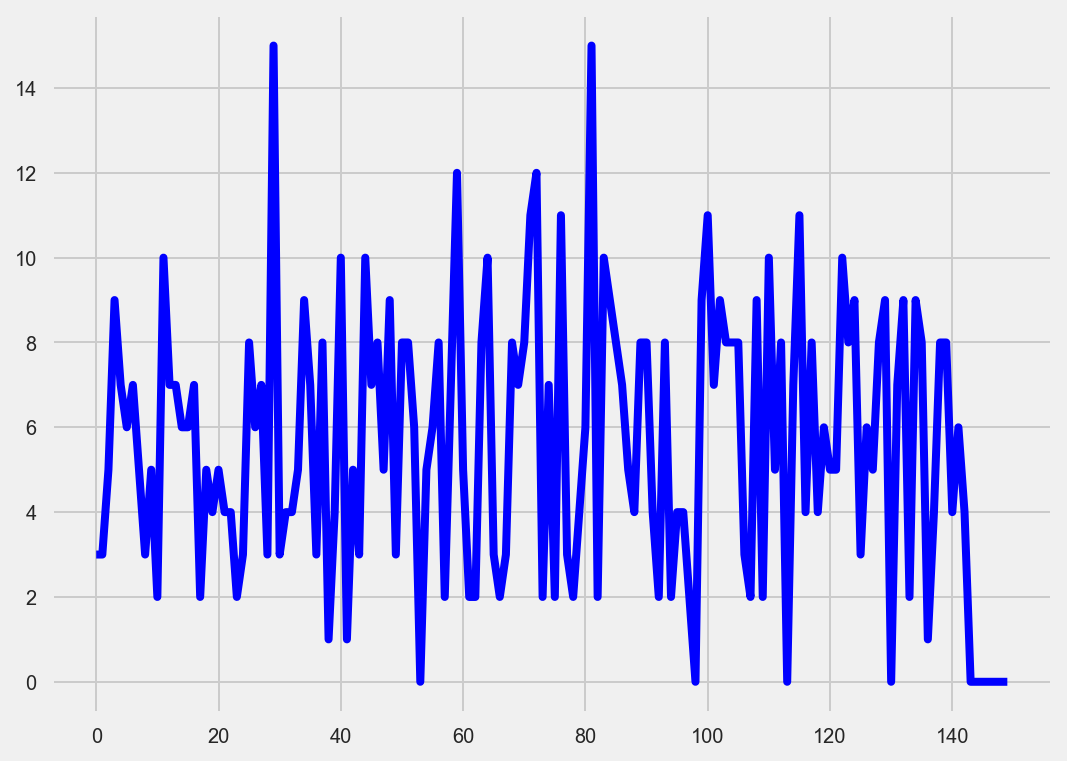

In [15]:
motif_f = "Results/Figures/SuppFigure3/TSS1.exp_refseq_centered_meme/fimo.tsv"

motifs_df = pd.read_csv(motif_f,sep="\t",comment="#")


peak_f = "Results/output/TSS1.exp.bed"
peaks_df = read_bed_file(peak_f)

curr = motifs_df.query("motif_id == 'inr.motif' ")
num_nts = np.max(curr["stop"])#np.max(curr["stop"] - (curr["start"])+1)
curr_out_pos = motif_analysis.initialize_motif_df(peaks_df.index,seq_len=num_nts)

#first_seq = curr_out.columns.values[0]
first_seq = curr_out_pos.columns.values[0]

for ind,val in tqdm.tqdm_notebook(curr.iterrows()):
    if val["strand"] == "+":
        curr_out_pos.at[val["sequence_name"],first_seq + val["start"] - 1] = True

N = 10
f = plt.figure()
plt.plot(np.convolve(np.array(curr_out_pos.sum()), np.ones((N,))/N, mode='valid'))

f = plt.figure()
plt.plot((np.array(curr_out_pos.sum())))
